In [2]:
from pathlib import Path
import os
import pickle
from config import model_config

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle(Path('../data/df_clean_w_outliers.pkl'))
df = df.drop(columns=['study_date_mask_cl', 'study_date_mask_pe',])
df = df.dropna(subset='total_clot_burden')
df['resolved_pe'] = df['resolved_pe'].map({'Unresolved': 0, 'Resolved': 1})
print(df.shape)
df.head()

(104, 113)


,pe_study_number,patient_id,gender_pe,series_id,slice_number,centralartery,apical_rs1,posterior_rs2,anterior_rs3,lateral_rs4,...,peak_cao2,peak_cvo2,peak_cavo2,peak_paao2,peak_fick_co,peak_vd_vt,peak_cavo2_a_art_hb,normal,dob_mask_cl,study_age_cl
PE1_0,PE1,HB046619,M,3.0,174.0,11.931900,0.399756,0.412309,0.326371,0.653708,...,20.46894,6.82500,13.64394,2.905439,15.604727,0.130000,0.885970,0,1977-12-13,49.886379
PE12_0,PE12,HB046622,M,4.0,264.0,0.102822,0.041968,0.000000,0.002098,0.405691,...,20.68356,8.21862,12.46494,19.274715,16.523663,0.205714,0.799035,0,1986-05-02,45.412731
PE12_1,PE12,HB046622,M,2.0,95.0,1.391170,0.000000,0.000000,0.000000,0.114441,...,20.68356,8.21862,12.46494,19.274715,16.523663,0.205714,0.799035,0,1986-05-02,45.412731
PE14_0,PE14,HB046616,F,4.0,111.0,0.825384,0.000000,0.000000,0.000000,0.097104,...,16.34052,7.41872,8.92180,3.302519,18.254263,0.210000,0.737339,0,1997-04-05,31.616701
PE15_0,PE15,HB046618,F,3.0,315.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.79862,8.58190,12.21672,23.804380,11.849891,0.260000,0.778135,0,2010-08-21,18.699521


In [21]:
print(len(model_config.body_feat))
print(len(model_config.cardiopulmonary_feat))
print(len(model_config.num_targets))

17
18
21


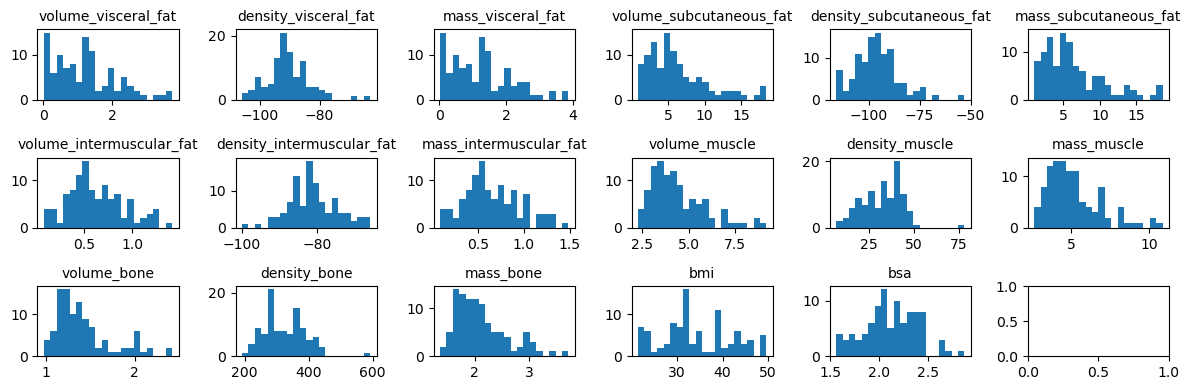

In [26]:
fig, axs = plt.subplots(3, 6, figsize=(12, 4))
for i, ax in enumerate(axs.reshape(-1)):
    if i < len(model_config.body_feat):
        feat_name = model_config.body_feat[i]
        ax.hist(df[feat_name], bins=20)
        ax.set_title(feat_name, fontsize=10)
plt.tight_layout()
plt.show()

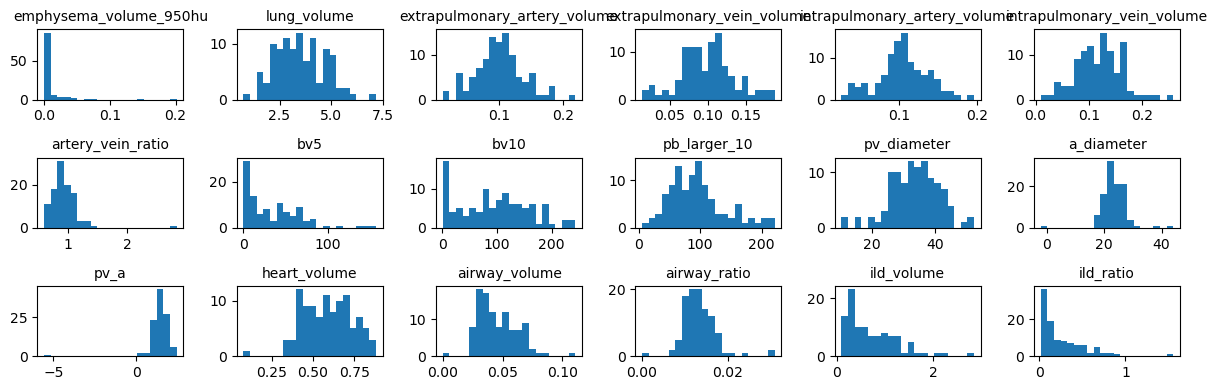

In [27]:
fig, axs = plt.subplots(3, 6, figsize=(12, 4))
for i, ax in enumerate(axs.reshape(-1)):
    if i < len(model_config.cardiopulmonary_feat):
        feat_name = model_config.cardiopulmonary_feat[i]
        ax.hist(df[feat_name], bins=20)
        ax.set_title(feat_name, fontsize=10)
plt.tight_layout()
plt.show()

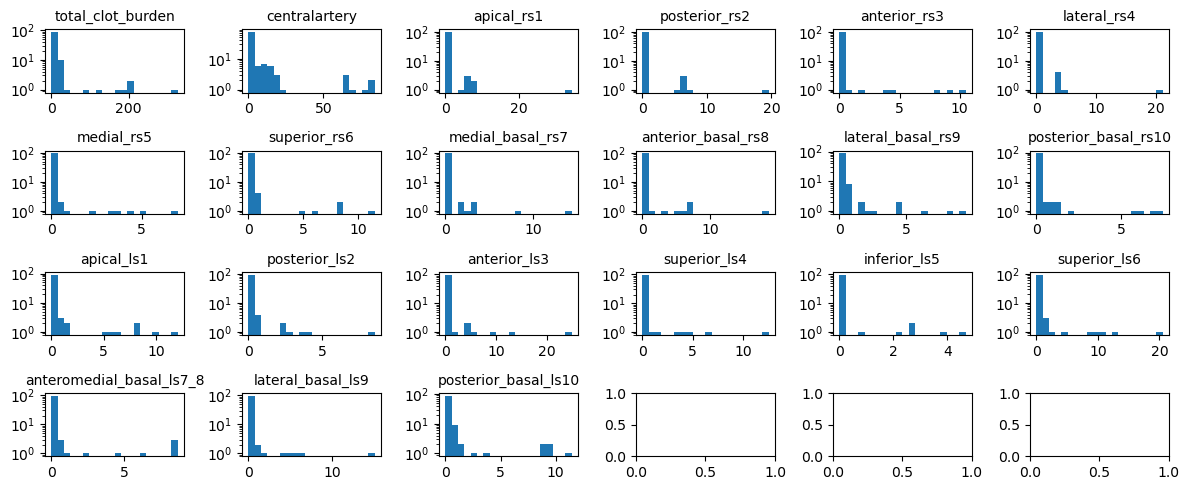

In [30]:
fig, axs = plt.subplots(4, 6, figsize=(12, 5))
for i, ax in enumerate(axs.reshape(-1)):
    if i < len(model_config.num_targets):
        feat_name = model_config.num_targets[i]
        ax.hist(df[feat_name], bins=20, log=True)
        ax.set_title(feat_name, fontsize=10)
plt.tight_layout()
plt.show()